# 1

In [71]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
titanic = pd.read_csv('/Users/hamiddastgir/Library/CloudStorage/Dropbox/Semester 3/AAI 595 - Applied Machine Learning/Assignments/Homework 3/Titanic.csv')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


# Display the first few rows of the dataframe
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 1.1

In [3]:
# checking which values are Null

In [4]:
titanic.isnull().sum()

Unnamed: 0       0
pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
ticket           0
fare             1
cabin         1014
embarked         2
boat           823
body          1188
home.dest      564
dtype: int64

In [5]:
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# removing null values using mean and mode

In [7]:
titanic['age'].fillna(titanic['age'].mean(), inplace= True)
titanic['fare'].fillna(titanic['fare'].mean(), inplace= True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True) # different variables, used mode
titanic['body'].fillna(titanic['body'].mean(), inplace = True)
titanic['home.dest'].fillna(titanic['home.dest'].mode()[0], inplace = True) # mode
titanic['cabin'].fillna(titanic['cabin'].mode()[0], inplace= True) # mode
titanic['boat'].fillna(titanic['boat'].mode()[0], inplace = True) # mode

In [8]:
titanic.isnull().sum()

Unnamed: 0    0
pclass        0
survived      0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
boat          0
body          0
home.dest     0
dtype: int64

# 1.2

In [9]:
subset_titanic = titanic[['pclass', 'sex', 'age', 'sibsp', 'survived']].reset_index()

In [10]:
subset_titanic

,index,pclass,sex,age,sibsp,survived
0,0,1st,female,29.000000,0,1
1,1,1st,male,0.916700,1,1
2,2,1st,female,2.000000,1,0
3,3,1st,male,30.000000,1,0
4,4,1st,female,25.000000,1,0
...,...,...,...,...,...,...
1304,1304,3rd,female,14.500000,1,0
1305,1305,3rd,female,29.881135,1,0
1306,1306,3rd,male,26.500000,0,0
1307,1307,3rd,male,27.000000,0,0


## 1.3

In [11]:
# proof of survived being binary

In [12]:
subset_titanic['survived'].unique()

array([1, 0])

In [13]:
subset_titanic['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [19]:
subset_titanic['survived'][3] == False

True

# 2

## 2.1

In [21]:
def QuantileBinning(feature, bin_number):
    return pd.qcut(feature, q = bin_number, labels = False, duplicates= 'drop')

In [22]:
subset_titanic['age'] = QuantileBinning(subset_titanic['age'], 4)

In [23]:
subset_titanic['pclass'].value_counts()

pclass
3rd    709
1st    323
2nd    277
Name: count, dtype: int64

In [24]:
subset_titanic['pclass'] = subset_titanic['pclass'].map({'1st': 1, '2nd':2, '3rd': 3})

In [25]:
subset_titanic['sex'] = subset_titanic['sex'].map({'male': 1, 'female': 0})

In [26]:
subset_titanic

,index,pclass,sex,age,sibsp,survived
0,0,1,0,1,0,1
1,1,1,1,0,1,1
2,2,1,0,0,1,0
3,3,1,1,2,1,0
4,4,1,0,1,1,0
...,...,...,...,...,...,...
1304,1304,3,0,0,1,0
1305,1305,3,0,1,1,0
1306,1306,3,1,1,0,0
1307,1307,3,1,1,0,0


## 1.4

In [41]:
x_train, x_test, y_train, y_test = train_test_split(subset_titanic[['pclass', 'sex', 'age', 'sibsp']], subset_titanic[['survived']],  test_size= 0.2, random_state= 42,)

In [28]:
y_train

,survived
772,0
543,0
289,1
10,0
147,0
...,...
1095,0
1130,0
1294,0
860,1


In [29]:
x_train

,pclass,sex,age,sibsp
772,3,1,0,0
543,2,1,3,0
289,1,0,0,0
10,1,1,3,1
147,1,1,1,0
...,...,...,...,...
1095,3,0,1,0
1130,3,0,0,0
1294,3,1,1,0
860,3,0,1,0


## 2.2

In [30]:
model = DecisionTreeClassifier(criterion= 'entropy')

In [31]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [32]:
info_gains = model.feature_importances_
print(info_gains)

[0.26485106 0.5781793  0.06492229 0.09204734]


the data suggests that the sex is very import since it has the highest information gain

# 3

## 3.1

In [33]:
model = DecisionTreeClassifier(criterion= 'gini', max_leaf_nodes= 20, random_state= 20025313)

In [34]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=20, random_state=20025313)

## 3.2

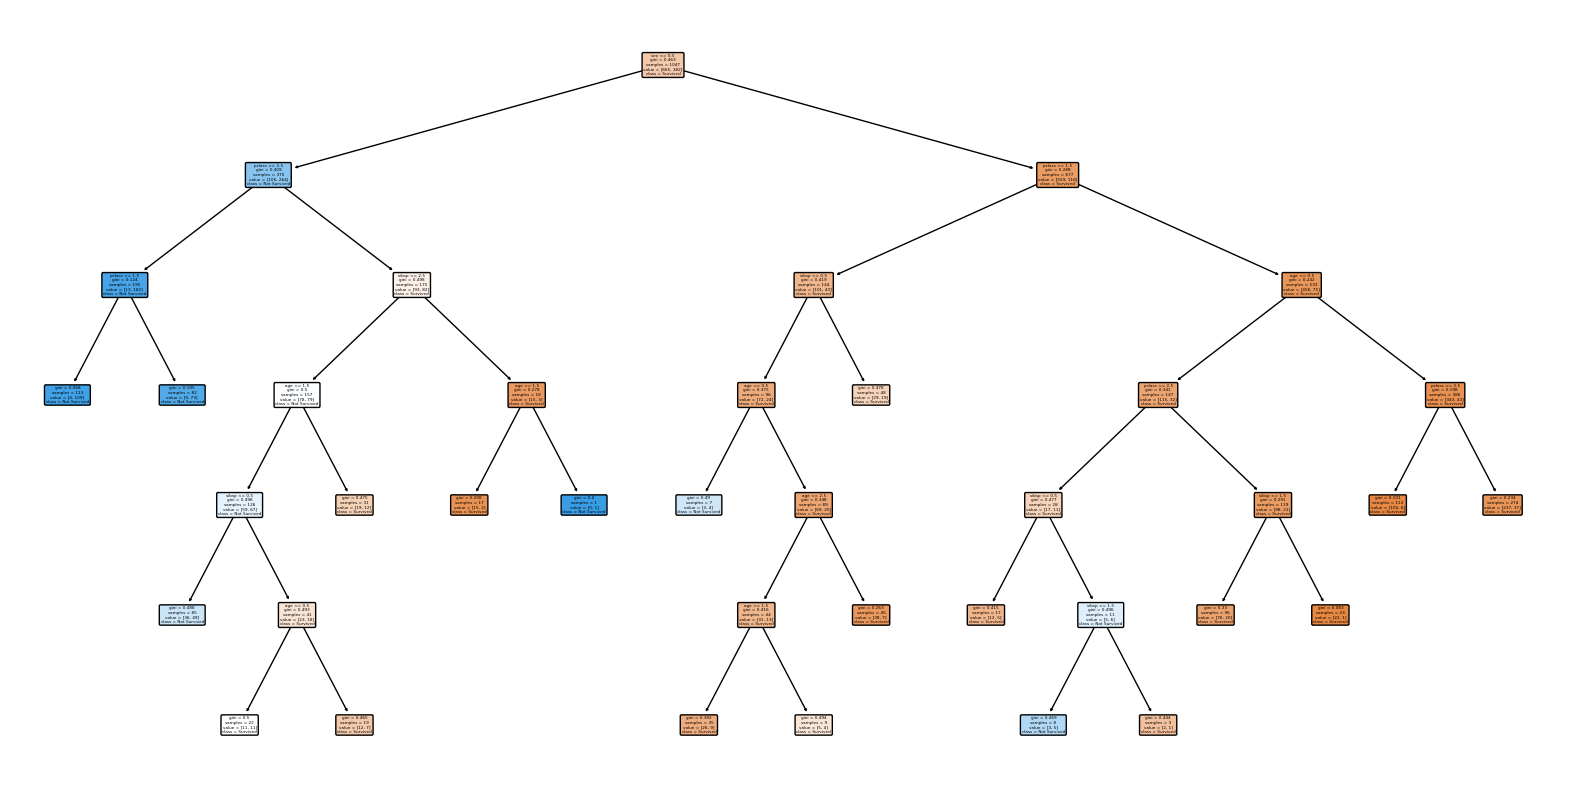

In [35]:
plt.figure(figsize=(20,10))

plot_tree(model, feature_names= ['pclass', 'sex', 'age', 'sibsp'], class_names= ['Survived', 'Not Survived'], filled= True, rounded= True, fontsize=3, )

plt.savefig('tree.png', format = 'png', dpi = 300)

plt.show()

## 3.3

In [54]:
y_test = y_test.values.flatten()

In [55]:
def accuracy(y_true, y_pred):
    return sum(yt == yp for yt, yp in zip(y_true, y_pred)) / len(y_true)

In [56]:
accuracy(y_test, y_pred)

0.7557251908396947

In [57]:
def precision(y_true, y_pred):
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    fp = sum((yt == 0 and yp == 1) for yt, yp in zip(y_true, y_pred))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

In [58]:
precision(y_test, y_pred)

0.8375

In [59]:
def recall(y_true, y_pred):
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    fn = sum((yt == 1 and yp == 0) for yt, yp in zip(y_true, y_pred))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

In [60]:
recall(y_test, y_pred)

0.5677966101694916

In [61]:
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0

In [62]:
f1_score(y_test, y_pred)

0.6767676767676768

# Step 4

## 4.1

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_leaf_nodes': list(range(5, 20))}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring= 'accuracy')
grid_search.fit(x_train, y_train.values.ravel())

best_model = grid_search.best_estimator_
print("Optimal max_leaf_nodes:", grid_search.best_params_['max_leaf_nodes'])

y_pred = best_model.predict(x_test)


Optimal max_leaf_nodes: 6


## 4.2

Performance Metrics:
Accuracy: 0.767175572519084
Precision: 0.8064516129032258
Recall: 0.635593220338983
F1 Score: 0.7109004739336493


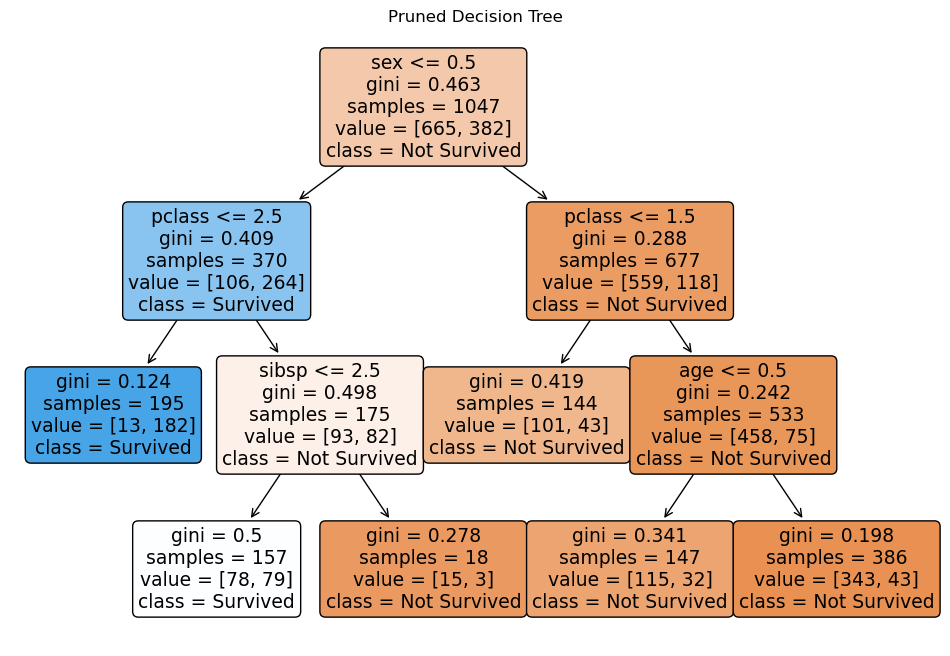

In [82]:
print("Performance Metrics:")
print("Accuracy:", accuracy(y_test, y_pred))
print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



plt.figure(figsize=(12, 8))
plot_tree(
    best_model, 
    feature_names=x_train.columns.to_list(), 
    class_names=['Not Survived', 'Survived'], 
    filled=True, 
    rounded=True
)
plt.title("Pruned Decision Tree")
plt.show()

# Step 5


## 5.1

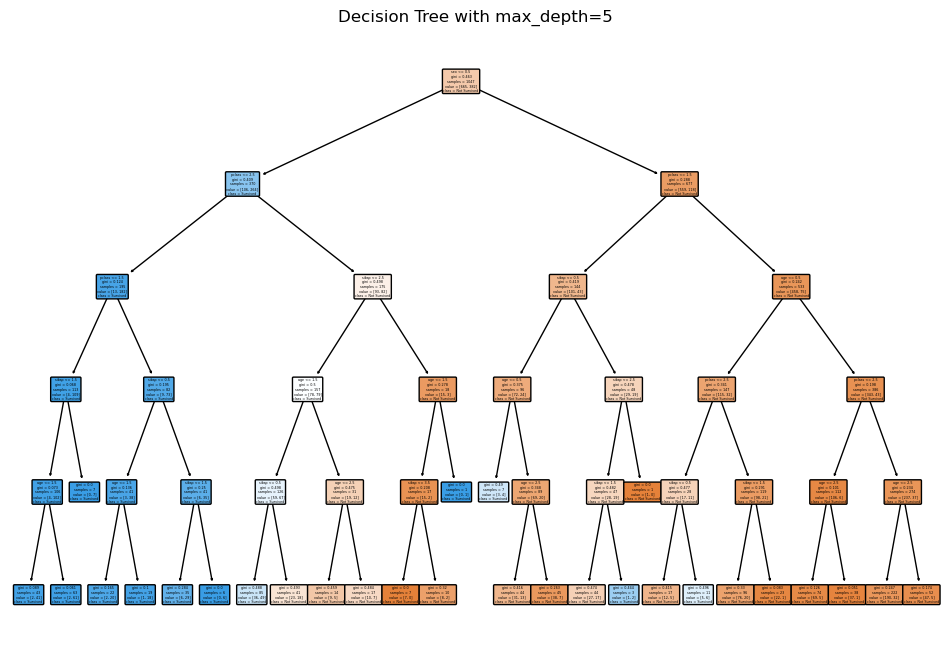

In [74]:
# Decision Tree with `max_depth` set to 5
dt_max_depth = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_max_depth.fit(x_train, y_train.values.ravel())
plt.figure(figsize=(12, 8))
plot_tree(
    dt_max_depth,
    feature_names=x_train.columns.tolist(),
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree with max_depth=5")
plt.show()

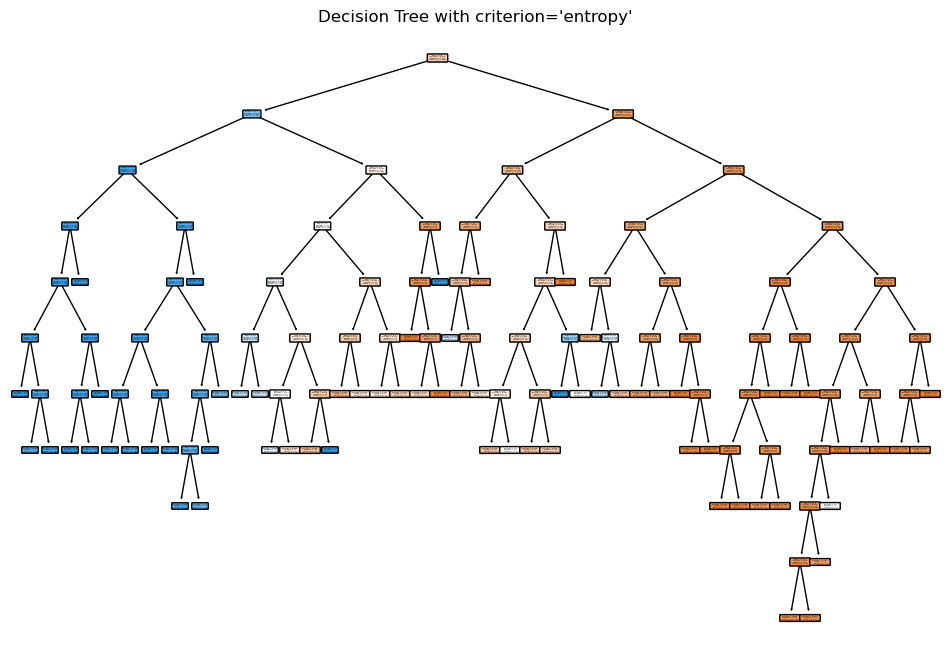

In [75]:
# Decision Tree with `criterion='entropy'`
dt_opt_criteria = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_opt_criteria.fit(x_train, y_train.values.ravel())

plt.figure(figsize=(12, 8))
plot_tree(
    dt_opt_criteria,
    feature_names=x_train.columns.tolist(),
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree with criterion='entropy'")
plt.show()


## 5.2

In [76]:
def ensemble_vote(models, X):
    """
    Perform majority voting among the models.

    Parameters:
        models (list): List of trained decision tree models.
        X (DataFrame): Input data for predictions.

    Returns:
        np.array: Ensemble predictions.
    """
    predictions = [model.predict(X) for model in models]
    predictions = np.array(predictions).T
    ensemble_predictions = [np.bincount(row).argmax() for row in predictions]
    return np.array(ensemble_predictions)

In [77]:
models = [best_model, dt_max_depth, dt_opt_criteria]

In [78]:
ensemble_predictions = ensemble_vote(models, x_test)

In [79]:
print("Ensemble Model Performance:")
print("Accuracy:", accuracy(y_test, ensemble_predictions))
print("Precision:", precision(y_test, ensemble_predictions))
print("Recall:", recall(y_test, ensemble_predictions))
print("F1 Score:", f1_score(y_test, ensemble_predictions))

Ensemble Model Performance:
Accuracy: 0.767175572519084
Precision: 0.8275862068965517
Recall: 0.6101694915254238
F1 Score: 0.702439024390244


## 5.3

In [80]:
rf_model = RandomForestClassifier(
    n_estimators=50, 
    max_leaf_nodes=grid_search.best_params_['max_leaf_nodes'],  # Optimal tree size from Step 4
    random_state=42
)
rf_model.fit(x_train, y_train.values.ravel())


RandomForestClassifier(max_leaf_nodes=6, n_estimators=50, random_state=42)

In [81]:
rf_predictions = rf_model.predict(x_test)

print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy(y_test, rf_predictions))
print("Precision:", precision(y_test, rf_predictions))
print("Recall:", recall(y_test, rf_predictions))
print("F1 Score:", f1_score(y_test, rf_predictions))

print("\nComparison of Ensemble vs Random Forest:")
print("Ensemble Accuracy:", accuracy(y_test, ensemble_predictions))
print("Random Forest Accuracy:", accuracy(y_test, rf_predictions))


Random Forest Model Performance:
Accuracy: 0.7366412213740458
Precision: 0.8888888888888888
Recall: 0.4745762711864407
F1 Score: 0.6187845303867403

Comparison of Ensemble vs Random Forest:
Ensemble Accuracy: 0.767175572519084
Random Forest Accuracy: 0.7366412213740458
